# Disease Prediction Model Report

## **Problem Statement:**
The goal of this project was to develop a machine learning model to predict whether a person has a specific disease based on various symptoms. The dataset consists of different symptoms, and the target variable is `prognosis`, which indicates the presence or absence of the disease. The challenge is to predict the disease status based on input features (symptoms).

## **Data and Features:**
The dataset contains 134 input features, representing symptoms such as:
- **Diarrhoea**
- **Sweating**
- **Unsteadiness**
- **Spinning Movements**
- **Bruising**
- **Swollen Legs**
- **Cramps**
- **Muscle Wasting**
- **Continuous Sneezing**
- **Joint Pain**, etc.

The target variable `prognosis` indicates the disease status.

## **Approach:**

1. **Data Preprocessing:**
   - **Missing Value Handling:** The dataset was checked for missing values, and imputation or removal strategies were applied.
   - **Categorical Encoding:** Categorical variables such as `yes/no` symptoms were encoded into numeric values.
   - **Feature Scaling:** Continuous variables were scaled using a standard scaler to ensure the model’s performance was not affected by differing ranges of features.
   
2. **Model Selection:**
   - **Logistic Regression** was chosen as the primary model due to its simplicity and effectiveness for binary classification problems, where the output is either a disease or no disease.
   - A train-test split was used to evaluate the model's performance on unseen data.

3. **Model Training and Evaluation:**
   - The Logistic Regression model was trained on the preprocessed dataset using `sklearn`.
   - The model was evaluated using accuracy, precision, recall, and F1-score.

## **Where the Model Failed:**

Despite the careful preprocessing and model selection, the logistic regression model did not perform as expected. Here are some key areas where it failed:

1. **Insufficient Model Complexity:**
   - Logistic Regression, being a linear model, might not be capable of capturing the complex, non-linear relationships between the symptoms and the disease status. Many real-world problems, especially in medical data, involve intricate interactions between features, which linear models struggle to model effectively.
   
2. **Overfitting or Underfitting:**
   - The model could be overfitting to the training data, especially if the dataset is small or if there is noise in the data. This could result in poor generalization to new, unseen data.
   - Alternatively, underfitting could occur if the model is too simple to capture the patterns in the data.

3. **Feature Selection Issues:**
   - While the correlation analysis indicated that certain features like `diarrhoea`, `sweating`, `muscle_wasting`, and others are important for predicting the disease, there could be irrelevant or redundant features in the dataset that may have impacted the model’s performance.
   - Some features may need to be further engineered to enhance the model’s performance.

4. **Class Imbalance:**
   - If the dataset contains imbalanced classes (i.e., far more instances of one class than the other), the model might have biased predictions. This could cause it to predict the majority class (e.g., no disease) most of the time, thereby reducing the predictive accuracy for the minority class (disease present).

5. **Model Evaluation and Metrics:**
   - The accuracy metric alone may not provide enough information. If the classes are imbalanced, the model could achieve a high accuracy score just by predicting the majority class most of the time, which does not necessarily reflect its ability to predict the disease accurately.

6. **Data Quality:**
   - There may be issues with the quality of the data, such as noisy or incorrect labels. If the data itself is flawed, even a well-designed model will struggle to make correct predictions.

## **Conclusion:**
The Logistic Regression model failed to solve the problem as accurately as expected due to several factors:
- Linear models are not always suitable for complex, non-linear relationships in medical data.
- Feature selection and data preprocessing might need further refinement.
- The model may need to be more complex (e.g., using tree-based models like Random Forests or XGBoost) to better capture interactions between features.

Moving forward, experimenting with more advanced models, such as **Random Forest**, **Support Vector Machines**, or **Neural Networks**, might improve prediction accuracy. Additionally, addressing issues such as class imbalance and using more advanced feature engineering techniques could lead to a better-performing model.


#Importing necessary libraries and loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [ ]:
#Loading the dataset
df = pd.read_csv('/content/Training.csv')

In [ ]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

# Data prerprocssing and Data visulazation

In [ ]:
print(df.dtypes)

itching                   int64
skin_rash                 int64
nodal_skin_eruptions      int64
continuous_sneezing       int64
shivering                 int64
                         ...   
blister                   int64
red_sore_around_nose      int64
yellow_crust_ooze         int64
prognosis                object
Unnamed: 133            float64
Length: 134, dtype: object


In [98]:
#Label encoding for target variable'prognosis'
le = LabelEncoder()
df['prognosis'] = le.fit_transform(df['prognosis'])

# Cheack the updated values

print(df['prognosis'].head())
# Save the encoder
with open('encoder.pkl', 'wb') as encoder_file:
    pickle.dump(le, encoder_file)

0    15
1    15
2    15
3    15
4    15
Name: prognosis, dtype: int64


In [ ]:
# Apply One-Hot Encoding for all categorical features
df_encoded = pd.get_dummies(df.drop(columns=['prognosis','Unnamed: 133']),drop_first=True)

# Add the target variable back
df_encoded['prognosis'] = df['prognosis']

df_encoded.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [ ]:
df.isnull().mean()

,0
itching,0.0
skin_rash,0.0
nodal_skin_eruptions,0.0
continuous_sneezing,0.0
shivering,0.0
...,...
blister,0.0
red_sore_around_nose,0.0
yellow_crust_ooze,0.0
prognosis,0.0


In [ ]:
df.fillna(0,inplace=True)

In [ ]:
print(df_encoded.dtypes)

itching                 int64
skin_rash               int64
nodal_skin_eruptions    int64
continuous_sneezing     int64
shivering               int64
                        ...  
inflammatory_nails      int64
blister                 int64
red_sore_around_nose    int64
yellow_crust_ooze       int64
prognosis               int64
Length: 133, dtype: object


#Visulalization

As there  are  134 cols lets select only those which are most correlated with target varuiable

In [ ]:
correlations = df.corr()['prognosis'].drop('prognosis')
top_features = correlations.abs().sort_values(ascending=False).head(20)
print("Top Features by Correlation with 'prognosis':")
print(top_features)

Top Features by Correlation with 'prognosis':
diarrhoea                   0.285993
sweating                    0.261934
unsteadiness                0.260331
spinning_movements          0.253230
bruising                    0.247315
prominent_veins_on_calf     0.247315
swollen_legs                0.247315
cramps                      0.247315
muscle_wasting              0.240568
patches_in_throat           0.240568
extra_marital_contacts      0.240568
swollen_blood_vessels       0.240568
continuous_sneezing         0.237346
continuous_feel_of_urine    0.234298
bladder_discomfort          0.234298
loss_of_balance             0.231000
pus_filled_pimples          0.227907
blackheads                  0.227907
scurring                    0.227907
joint_pain                  0.226410
Name: prognosis, dtype: float64


Text(0.5, 1.0, 'Top Features by Correlation with Prognosis')

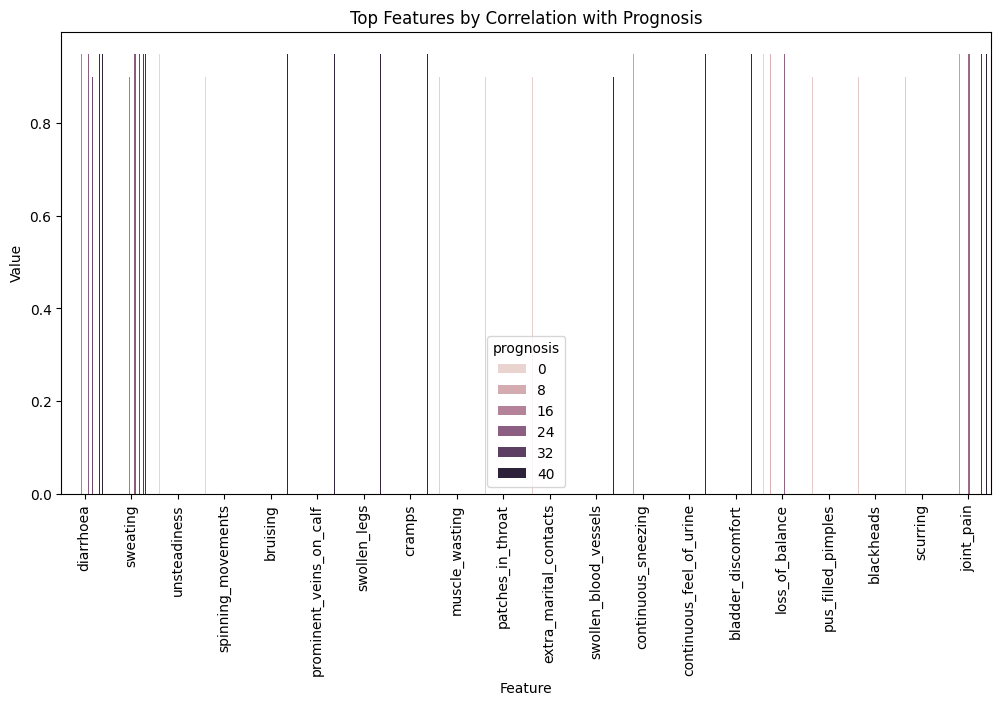

In [ ]:
# Melt data for visualization
melted_data = df_encoded[top_features.index.tolist() + ['prognosis']].melt(id_vars='prognosis', var_name='Feature', value_name='Value')

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Value', hue='prognosis', data=melted_data,ci=None)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Top Features by Correlation with Prognosis')

In [ ]:
df = df_encoded

In [ ]:
df.dtypes

,0
itching,int64
skin_rash,int64
nodal_skin_eruptions,int64
continuous_sneezing,int64
shivering,int64
...,...
inflammatory_nails,int64
blister,int64
red_sore_around_nose,int64
yellow_crust_ooze,int64


In [ ]:
top_features

,prognosis
diarrhoea,0.285993
sweating,0.261934
unsteadiness,0.260331
spinning_movements,0.253230
bruising,0.247315
prominent_veins_on_calf,0.247315
swollen_legs,0.247315
cramps,0.247315
muscle_wasting,0.240568
patches_in_throat,0.240568


In [ ]:
df_reduced = df[['prognosis']+top_features.index.tolist()]

In [ ]:
df_reduced.head()

,prognosis,diarrhoea,sweating,unsteadiness,spinning_movements,bruising,prominent_veins_on_calf,swollen_legs,cramps,muscle_wasting,...,extra_marital_contacts,swollen_blood_vessels,continuous_sneezing,continuous_feel_of_urine,bladder_discomfort,loss_of_balance,pus_filled_pimples,blackheads,scurring,joint_pain
0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=df_reduced

In [ ]:
df.head()

,prognosis,diarrhoea,sweating,unsteadiness,spinning_movements,bruising,prominent_veins_on_calf,swollen_legs,cramps,muscle_wasting,...,extra_marital_contacts,swollen_blood_vessels,continuous_sneezing,continuous_feel_of_urine,bladder_discomfort,loss_of_balance,pus_filled_pimples,blackheads,scurring,joint_pain
0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Top Features by Correlation with Prognosis')

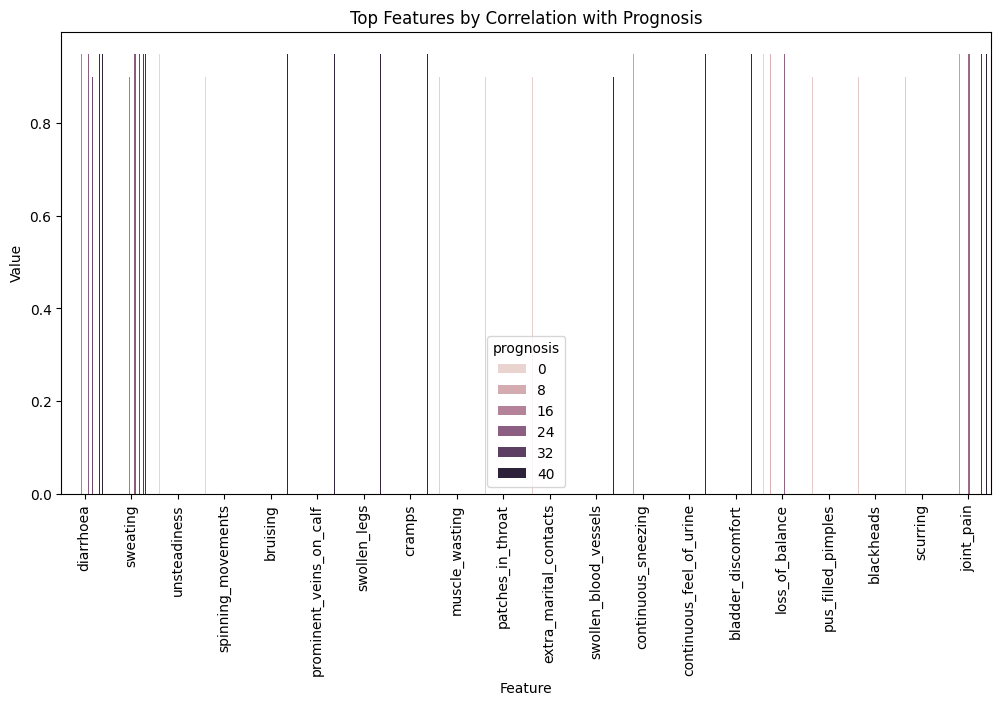

In [ ]:
#Bar Plot of Top Features by prognosis
melted_data = df.melt(id_vars='prognosis', var_name='Feature', value_name='Value')

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Value', hue='prognosis', data=melted_data,ci=None)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Top Features by Correlation with Prognosis')

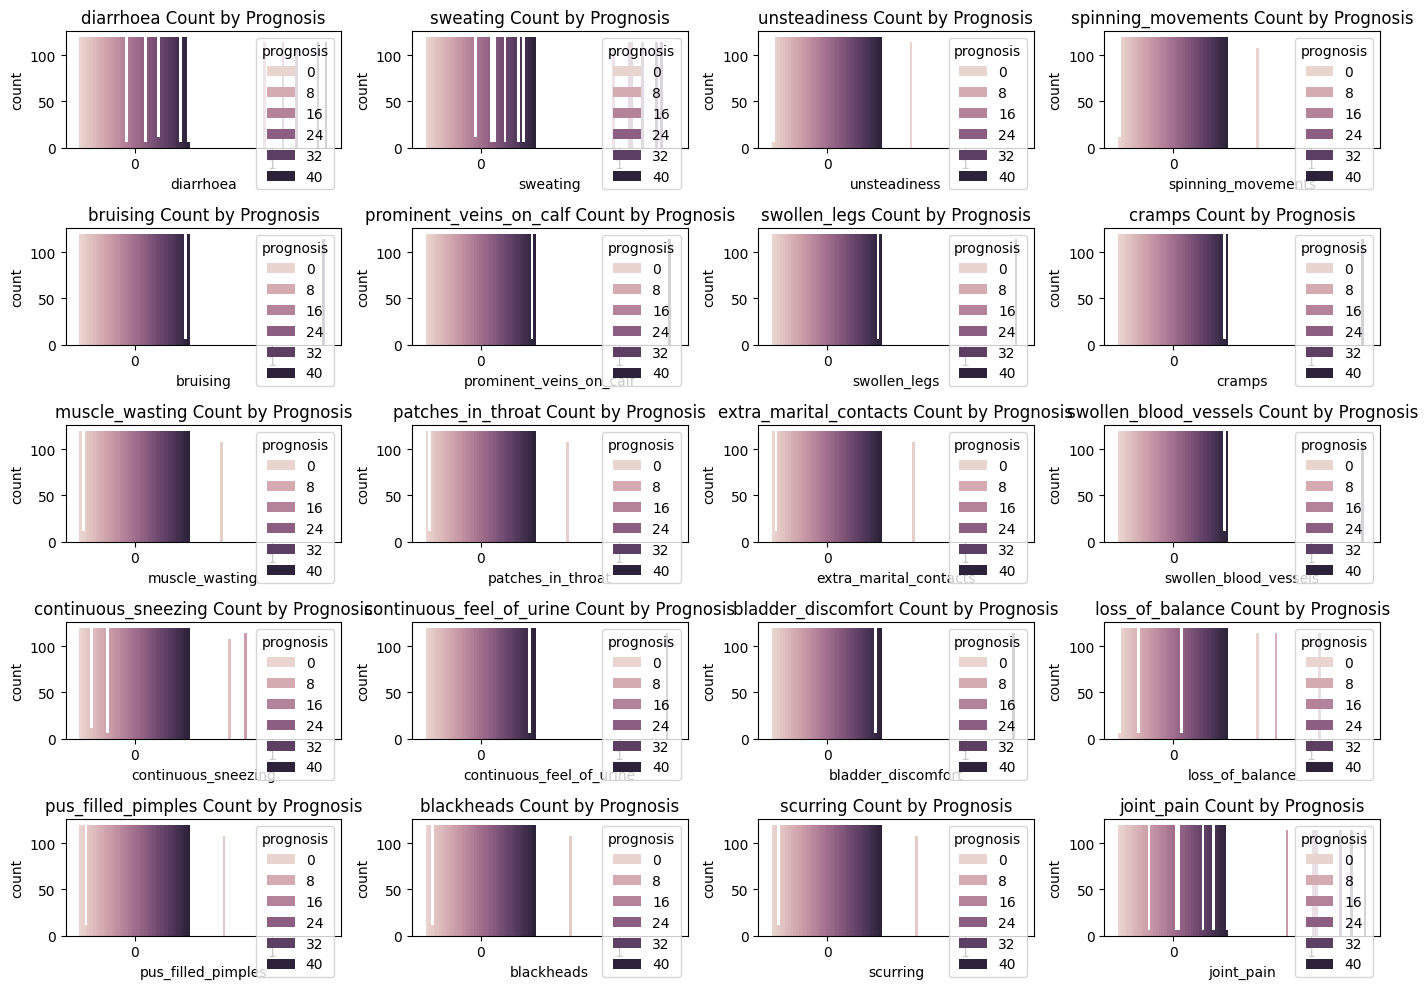

In [ ]:
# Count plot for each top feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_features.index, 1): # Iterate through index (column names)
    plt.subplot(5, 4, i)  # Adjust based on the number of features
    sns.countplot(x=feature, hue='prognosis', data=df)
    plt.title(f'{feature} Count by Prognosis')
    plt.tight_layout()
plt.show()

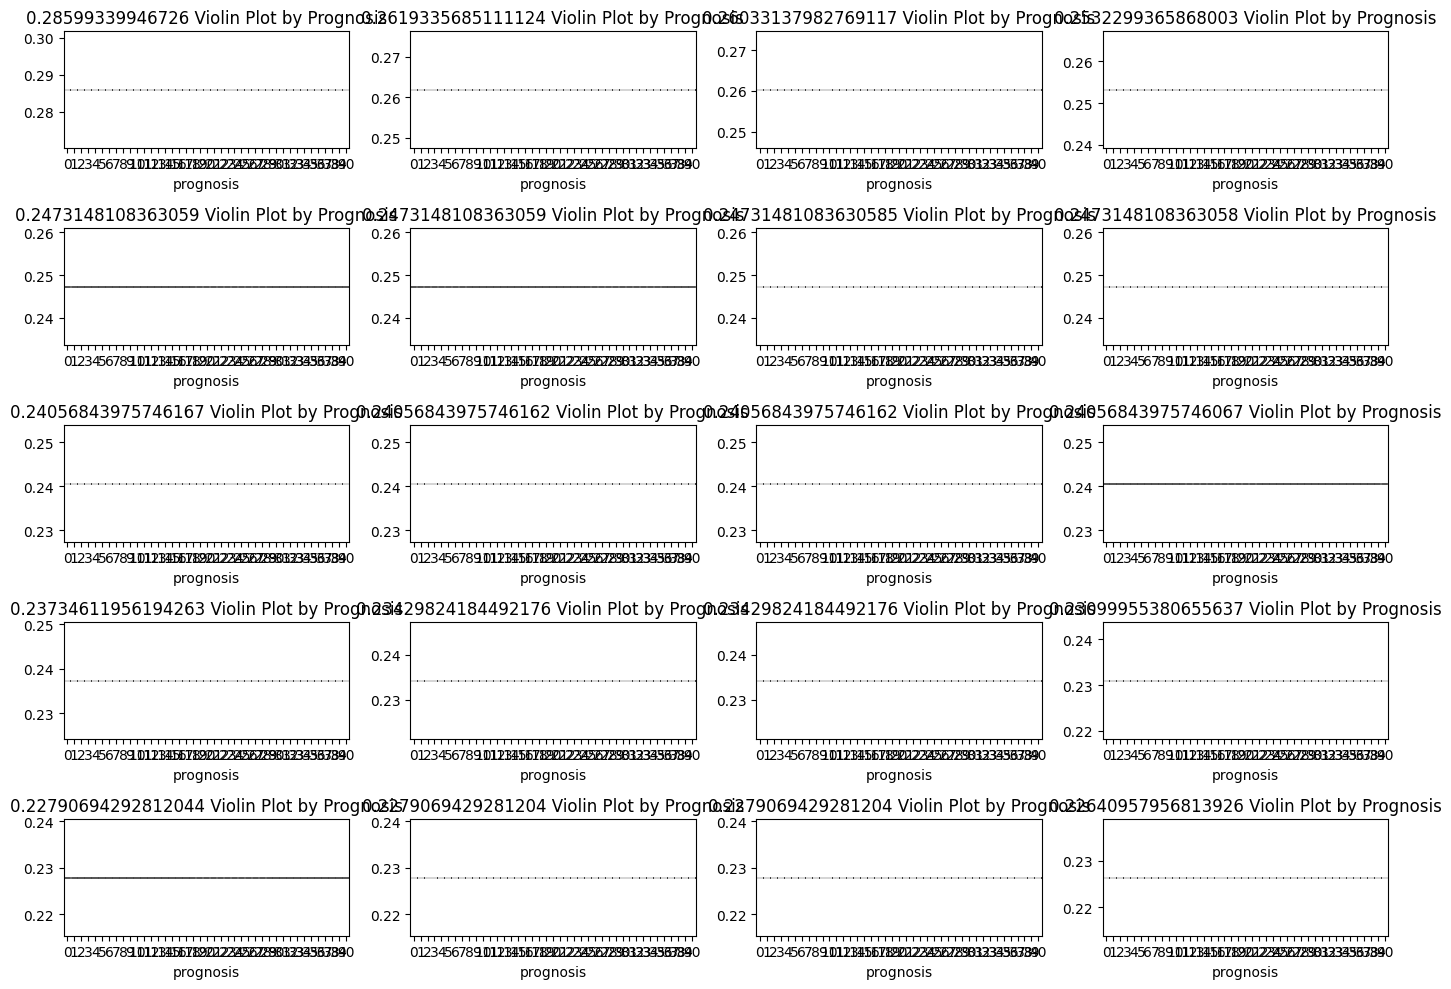

In [ ]:
# Violin plot for each feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(5, 4, i)  # Adjust based on the number of features
    sns.violinplot(x='prognosis', y=feature, data=df)
    plt.title(f'{feature} Violin Plot by Prognosis')
    plt.tight_layout()
plt.show()


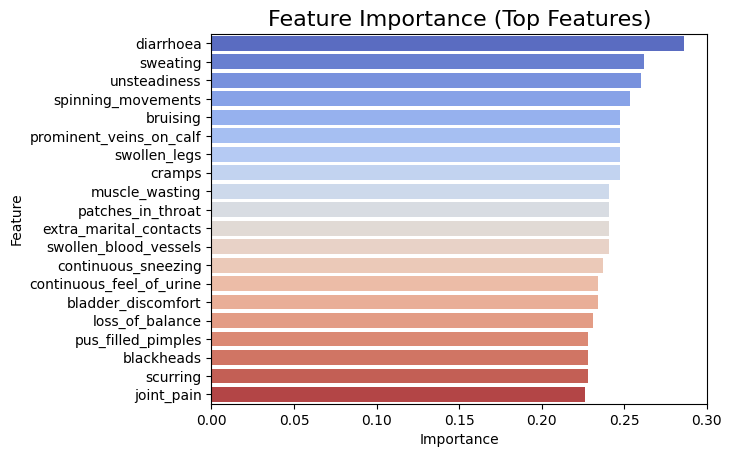

In [ ]:
# Assuming feature_importance DataFrame from Logistic Regression
feature_importance = df.head(20)  # Top 20 features

# Get the column names (features) and their importances
features = top_features.index # Assuming 'top_features' contains feature importances
importances = top_features.values

# Create a DataFrame for the bar plot
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Create the bar plot
sns.barplot(data=feature_importance_df, y='Feature', x='Importance', palette='coolwarm')
plt.title('Feature Importance (Top Features)', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

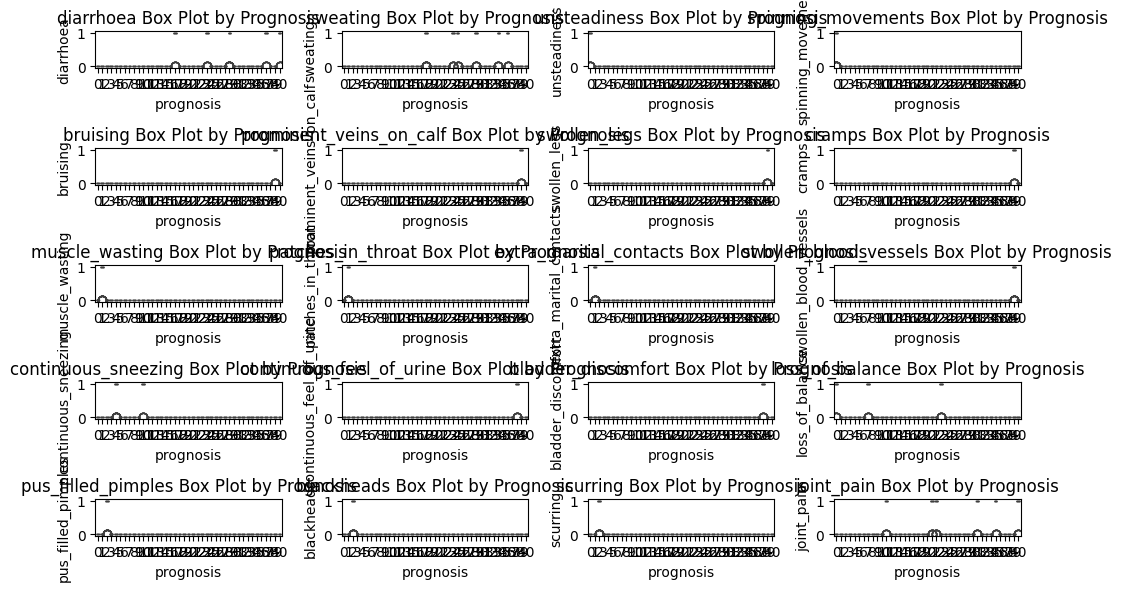

In [ ]:
plt.figure(figsize=(10,6))
for i,feature in enumerate(top_features.index,1):
  plt.subplot(5,4,i)
  sns.boxplot(x='prognosis',y=feature,data=df)
  plt.title(f'{feature} Box Plot by Prognosis')
  plt.tight_layout()
plt.show()

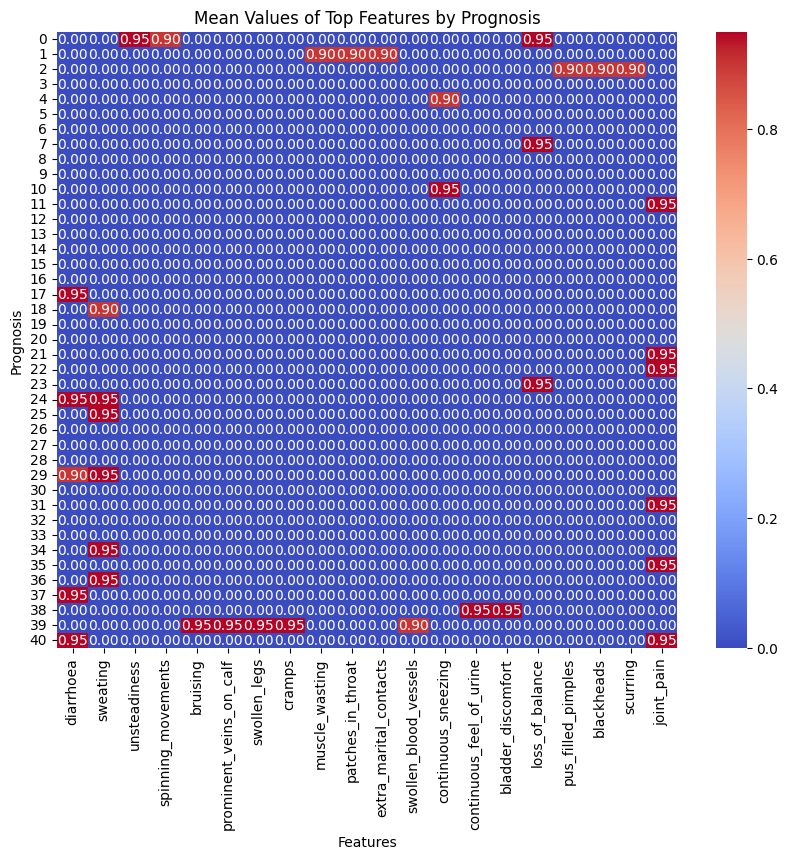

In [ ]:
# Calculate mean values
mean_values = df.groupby('prognosis')[top_features.index].mean()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mean_values, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mean Values of Top Features by Prognosis')
plt.ylabel('Prognosis')
plt.xlabel('Features')
plt.show()


In [ ]:
X = df.drop(columns=['prognosis'])
y = df['prognosis']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler
import pickle

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform both X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for future use
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Scaling applied and scaler saved successfully!")


Scaling applied and scaler saved successfully!


In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100,random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

#3. Model Evaluation

In [89]:
y_pred = model.predict(X_test)

In [90]:
# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score # Import precision_score and recall_score
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='weighted'))
print("Recall:",recall_score(y_test,y_pred,average='weighted'))

Accuracy: 0.23678861788617886
Precision: 0.1516806750666983
Recall: 0.23678861788617886


In [91]:
print(df['prognosis'].value_counts())


prognosis
15    120
20    120
22    120
3     120
36    120
10    120
34    120
13    120
18    120
39    120
26    120
24    120
25    120
31    120
5     120
0     120
2     120
38    120
35    120
21    120
19    120
4     120
40    120
16    120
9     120
14    120
33    120
1     120
12    120
17    120
6     120
23    120
30    120
7     120
32    120
28    120
29    120
8     120
11    120
37    120
27    120
Name: count, dtype: int64


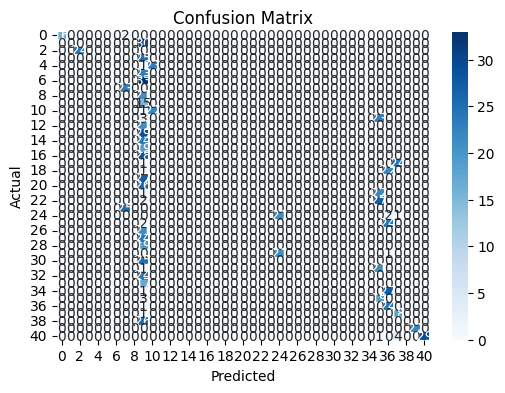

In [92]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Weighted ROC-AUC Score: 0.50


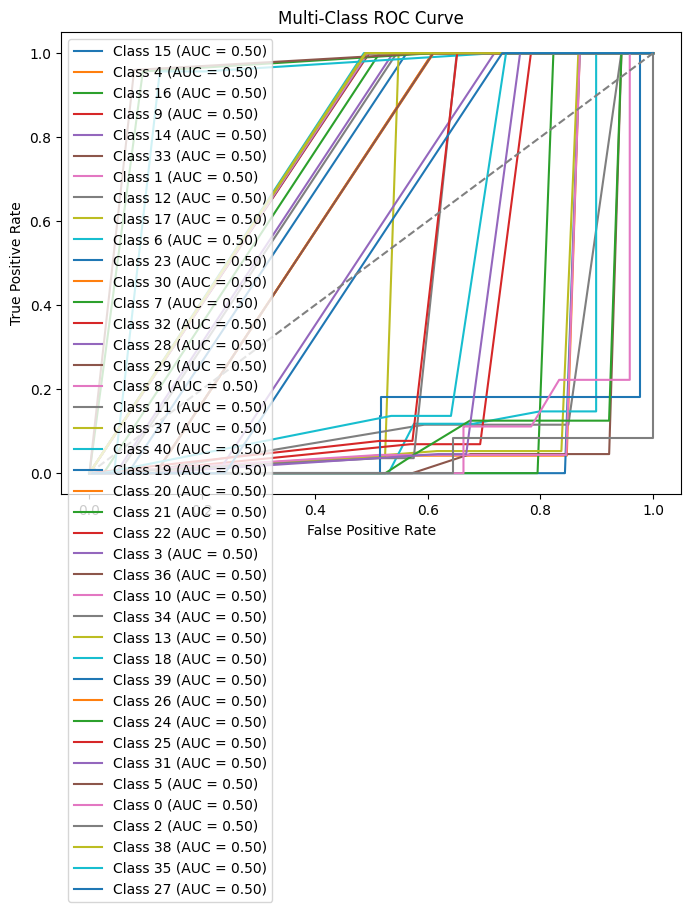

In [93]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class ROC curve
classes = y.unique()  # List of unique classes
y_test_binarized = label_binarize(y_test, classes=classes)

# Get probabilities for all classes
y_proba = model.predict_proba(X_test)

# Compute ROC-AUC score (weighted average)
auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr', average='weighted')
print(f"Weighted ROC-AUC Score: {auc:.2f}")

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_name} (AUC = {auc:.2f})')

# Add a reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend()
plt.show()


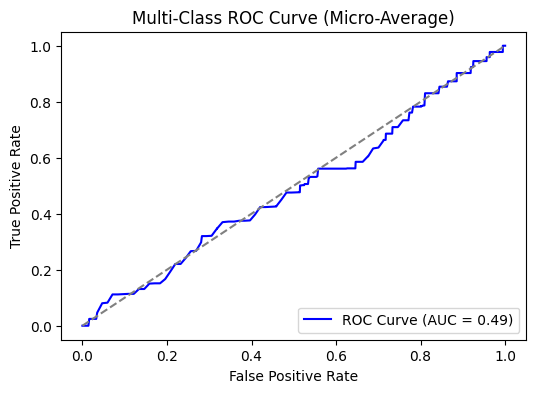

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output for multi-class
classes = y.unique()  # List of unique classes
y_test_binarized = label_binarize(y_test, classes=classes)

# Get probabilities for all classes
y_proba = model.predict_proba(X_test)

# Compute micro-average ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_proba.ravel())
auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr', average='micro')

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (Micro-Average)')
plt.legend(loc='lower right')
plt.show()


#5. Hyperparameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}


#6. Cross-Validation


In [96]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy: 0.30569105691056914


In [99]:
import pickle
# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)



In [100]:
new_df = pd.read_csv('/content/Testing.csv')

In [101]:
new_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [102]:
new_df['prognosis'].value_counts()

,count
prognosis,
Fungal infection,2
Hepatitis C,1
Hepatitis E,1
Alcoholic hepatitis,1
Tuberculosis,1
Common Cold,1
Pneumonia,1
Dimorphic hemmorhoids(piles),1
Heart attack,1


In [109]:
import pandas as pd
import numpy as np
import pickle

# Step 1: Load the Saved Files
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Step 2: Prepare New Data
# Ensure that the new data has the same features as used during training
new_data = pd.DataFrame({
    'diarrhoea': [1],
    'sweating': [0],
    'unsteadiness': [1],
    'spinning_movements': [0],
    'bruising': [1],
    'prominent_veins_on_calf': [0],
    'swollen_legs': [1],
    'cramps': [0],
    'muscle_wasting': [1],
    'patches_in_throat': [0],
    'extra_marital_contacts': [1],
    'swollen_blood_vessels': [0],
    'continuous_sneezing': [1],
    'continuous_feel_of_urine': [0],
    'bladder_discomfort': [1],
    'loss_of_balance': [1],
    'pus_filled_pimples': [0],
    'blackheads': [1],
    'scurring': [0],
    'joint_pain': [1]
})

# Get the feature names from the scaler
# Assuming the scaler was trained on a pandas DataFrame
feature_names = scaler.feature_names_in_

# Ensure columns are in the same order as the training data
# Reorder the columns in new_data to match the order during training
new_data = new_data.reindex(columns=feature_names)

# Step 3: Scale the New Data
new_data_scaled = scaler.transform(new_data)

# Step 4: Predict Using the Loaded Model
predicted_proba = model.predict_proba(new_data_scaled)
predicted_class = model.predict(new_data_scaled)

# Step 5: Map Predictions to Disease Labels
disease_labels = model.classes_  # Classes are stored in the model
predicted_disease = disease_labels[np.argmax(predicted_proba)]

# Step 6: Print Results
print("Predicted Disease:", predicted_disease)
print("Prediction Probabilities for Each Disease:")
for disease, proba in zip(disease_labels, predicted_proba[0]):
    print(f"{disease}: {proba:.4f}")

Predicted Disease: 0
Prediction Probabilities for Each Disease:
0: 0.9858
1: 0.0000
2: 0.0000
3: 0.0000
4: 0.0003
5: 0.0000
6: 0.0000
7: 0.0000
8: 0.0000
9: 0.0000
10: 0.0005
11: 0.0000
12: 0.0000
13: 0.0000
14: 0.0000
15: 0.0000
16: 0.0000
17: 0.0000
18: 0.0000
19: 0.0000
20: 0.0000
21: 0.0000
22: 0.0000
23: 0.0000
24: 0.0000
25: 0.0000
26: 0.0000
27: 0.0000
28: 0.0000
29: 0.0000
30: 0.0000
31: 0.0000
32: 0.0000
33: 0.0000
34: 0.0000
35: 0.0000
36: 0.0000
37: 0.0000
38: 0.0000
39: 0.0006
40: 0.0126
